<a href="https://colab.research.google.com/github/NETSADOM/Alx_DjangoLearnLab/blob/main/ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn xgboost catboost matplotlib seaborn plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://hbiostat.org/data/repo/diabetes.csv"
df_original = pd.read_csv(url)

In [4]:
df_original.to_csv('diabetes.csv', index=False)
print("✓ Data saved to 'diabetes.csv'")

✓ Data saved to 'diabetes.csv'


In [5]:
df = pd.read_csv('diabetes.csv')
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Data loaded: 403 rows, 19 columns


In [6]:
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)


First 5 rows:
     id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 ent

In [7]:
if 'glyhb' in df.columns:
    print(f"GlyHb - Mean: {df['glyhb'].mean():.2f}, Min: {df['glyhb'].min():.2f}, Max: {df['glyhb'].max():.2f}")

GlyHb - Mean: 5.59, Min: 2.68, Max: 16.11


In [8]:
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])


Missing values per column:
          Missing_Count  Percentage
chol                  1    0.248139
hdl                   1    0.248139
ratio                 1    0.248139
glyhb                13    3.225806
height                5    1.240695
weight                1    0.248139
frame                12    2.977667
bp.1s                 5    1.240695
bp.1d                 5    1.240695
bp.2s               262   65.012407
bp.2d               262   65.012407
waist                 2    0.496278
hip                   2    0.496278
time.ppn              3    0.744417


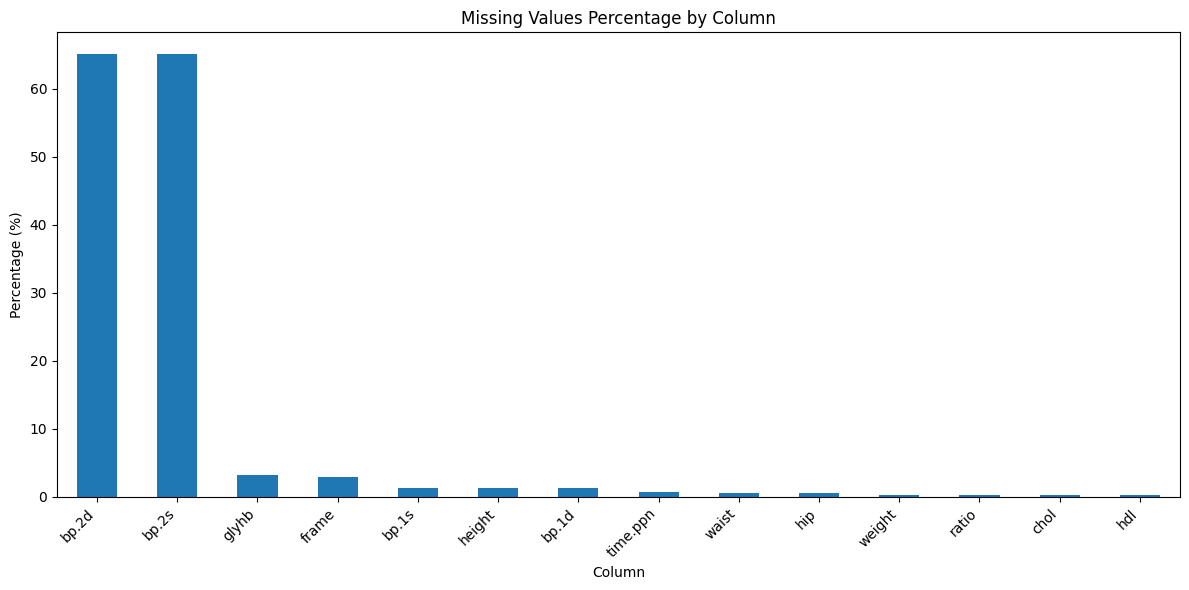

In [9]:
plt.figure(figsize=(12, 6))
missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)['Percentage'].plot(kind='bar')
plt.title('Missing Values Percentage by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
df_regression = df.copy()
df_regression = df_regression[df_regression['glyhb'].notna()]
print(f"\n Removed rows with missing GlyHb: {len(df) - len(df_regression)} rows removed")
print(f"Remaining rows: {len(df_regression)}")



 Removed rows with missing GlyHb: 13 rows removed
Remaining rows: 390


In [11]:
numeric_columns = [col for col in df_regression.select_dtypes(include=[np.number]).columns
                   if col not in ['id', 'glyhb']]

X_regression = df_regression[numeric_columns].copy()
y_regression = df_regression['glyhb'].copy()

print(f"Features shape: {X_regression.shape}")
print(f"Target shape: {y_regression.shape}")
print(f"Features: {X_regression.columns.tolist()}")

Features shape: (390, 14)
Target shape: (390,)
Features: ['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'height', 'weight', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn']


In [12]:
imputer = SimpleImputer(strategy='median')
X_regression_imputed = pd.DataFrame(
    imputer.fit_transform(X_regression),
    columns=X_regression.columns,
    index=X_regression.index
)

print(f"✓ Imputed missing values in features")

✓ Imputed missing values in features


In [13]:
# GlyHb >= 6.5% indicates diabetes
df_classification = df_regression.copy()
df_classification['diabetes'] = (df_classification['glyhb'] >= 6.5).astype(int)

X_classification = X_regression_imputed.copy()
y_classification = df_classification['diabetes'].copy()

print(f"Features shape: {X_classification.shape}")
print(f"Target shape: {y_classification.shape}")
print(f"Diabetes distribution:")
print(y_classification.value_counts())
print(f"Diabetes percentage: {(y_classification.sum() / len(y_classification)) * 100:.2f}%")


Features shape: (390, 14)
Target shape: (390,)
Diabetes distribution:
diabetes
0    325
1     65
Name: count, dtype: int64
Diabetes percentage: 16.67%


In [14]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression_imputed, y_regression, test_size=0.2, random_state=42
)

print(f"\nRegression Split:")
print(f"Training set: {X_train_reg.shape[0]} samples")
print(f"Test set: {X_test_reg.shape[0]} samples")



Regression Split:
Training set: 312 samples
Test set: 78 samples


In [15]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"\nClassification Split:")
print(f"Training set: {X_train_cls.shape[0]} samples")
print(f"Test set: {X_test_cls.shape[0]} samples")



Classification Split:
Training set: 312 samples
Test set: 78 samples


In [16]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("\nRegression features standardized (mean=0, std=1)")
print(f"Training set shape: {X_train_reg_scaled.shape}")



Regression features standardized (mean=0, std=1)
Training set shape: (312, 14)


In [17]:
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

print("\nClassification features standardized")
print(f"Training set shape: {X_train_cls_scaled.shape}")


Classification features standardized
Training set shape: (312, 14)


In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

In [19]:
regression_results = []
regression_models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(random_state=42),
    'Ridge Regression': Ridge(random_state=42),
    'ElasticNet Regression': ElasticNet(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostRegressor(iterations=100, random_state=42, verbose=0),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector': SVR(kernel='rbf')
}

print("\nTraining and evaluating regression models...")



Training and evaluating regression models...


In [20]:
for name, model in regression_models.items():
    print(f"\nTraining {name}...")

    # Train model
    model.fit(X_train_reg_scaled, y_train_reg)

    # Make predictions
    y_pred_train = model.predict(X_train_reg_scaled)
    y_pred_test = model.predict(X_test_reg_scaled)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_test))
    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)
    train_mae = mean_absolute_error(y_train_reg, y_pred_train)
    test_mae = mean_absolute_error(y_test_reg, y_pred_test)

    regression_results.append({
        'Model': name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae
    })

    print(f"  Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"  Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")



Training Linear Regression...
  Train RMSE: 1.3135, Test RMSE: 1.8153
  Train R²: 0.6228, Test R²: 0.5058
  Train MAE: 0.8997, Test MAE: 1.0328

Training Lasso Regression...
  Train RMSE: 1.7409, Test RMSE: 2.1991
  Train R²: 0.3375, Test R²: 0.2747
  Train MAE: 1.1686, Test MAE: 1.3617

Training Ridge Regression...
  Train RMSE: 1.3135, Test RMSE: 1.8155
  Train R²: 0.6228, Test R²: 0.5057
  Train MAE: 0.8999, Test MAE: 1.0332

Training ElasticNet Regression...
  Train RMSE: 1.6484, Test RMSE: 2.1137
  Train R²: 0.4059, Test R²: 0.3300
  Train MAE: 1.1061, Test MAE: 1.2980

Training K-Nearest Neighbors...
  Train RMSE: 1.2992, Test RMSE: 1.9208
  Train R²: 0.6310, Test R²: 0.4467
  Train MAE: 0.8518, Test MAE: 1.0869

Training Decision Tree...
  Train RMSE: 0.3537, Test RMSE: 2.0775
  Train R²: 0.9726, Test R²: 0.3527
  Train MAE: 0.2094, Test MAE: 1.2930

Training Random Forest...
  Train RMSE: 0.5877, Test RMSE: 1.7611
  Train R²: 0.9245, Test R²: 0.5349
  Train MAE: 0.3799, Test M

                Model  Train_RMSE  Test_RMSE  Train_R2  Test_R2  Train_MAE  Test_MAE
        Random Forest    0.587688   1.761087  0.924495 0.534880   0.379939  0.999746
    Gradient Boosting    0.519370   1.781994  0.941029 0.523771   0.400565  1.054117
             AdaBoost    0.996866   1.786571  0.782752 0.521322   0.823698  1.096004
             CatBoost    0.262215   1.796459  0.984969 0.516009   0.209592  1.000716
    Linear Regression    1.313512   1.815280  0.622818 0.505814   0.899669  1.032773
     Ridge Regression    1.313530   1.815497  0.622808 0.505696   0.899867  1.033221
              XGBoost    0.000901   1.864560  1.000000 0.478619   0.000589  1.093934
  K-Nearest Neighbors    1.299198   1.920817  0.630994 0.446682   0.851769  1.086949
       Support Vector    1.397984   1.989654  0.572745 0.406312   0.742195  1.096170
        Decision Tree    0.353733   2.077515  0.972645 0.352721   0.209428  1.292980
ElasticNet Regression    1.648432   2.113727  0.405948 0.329960  

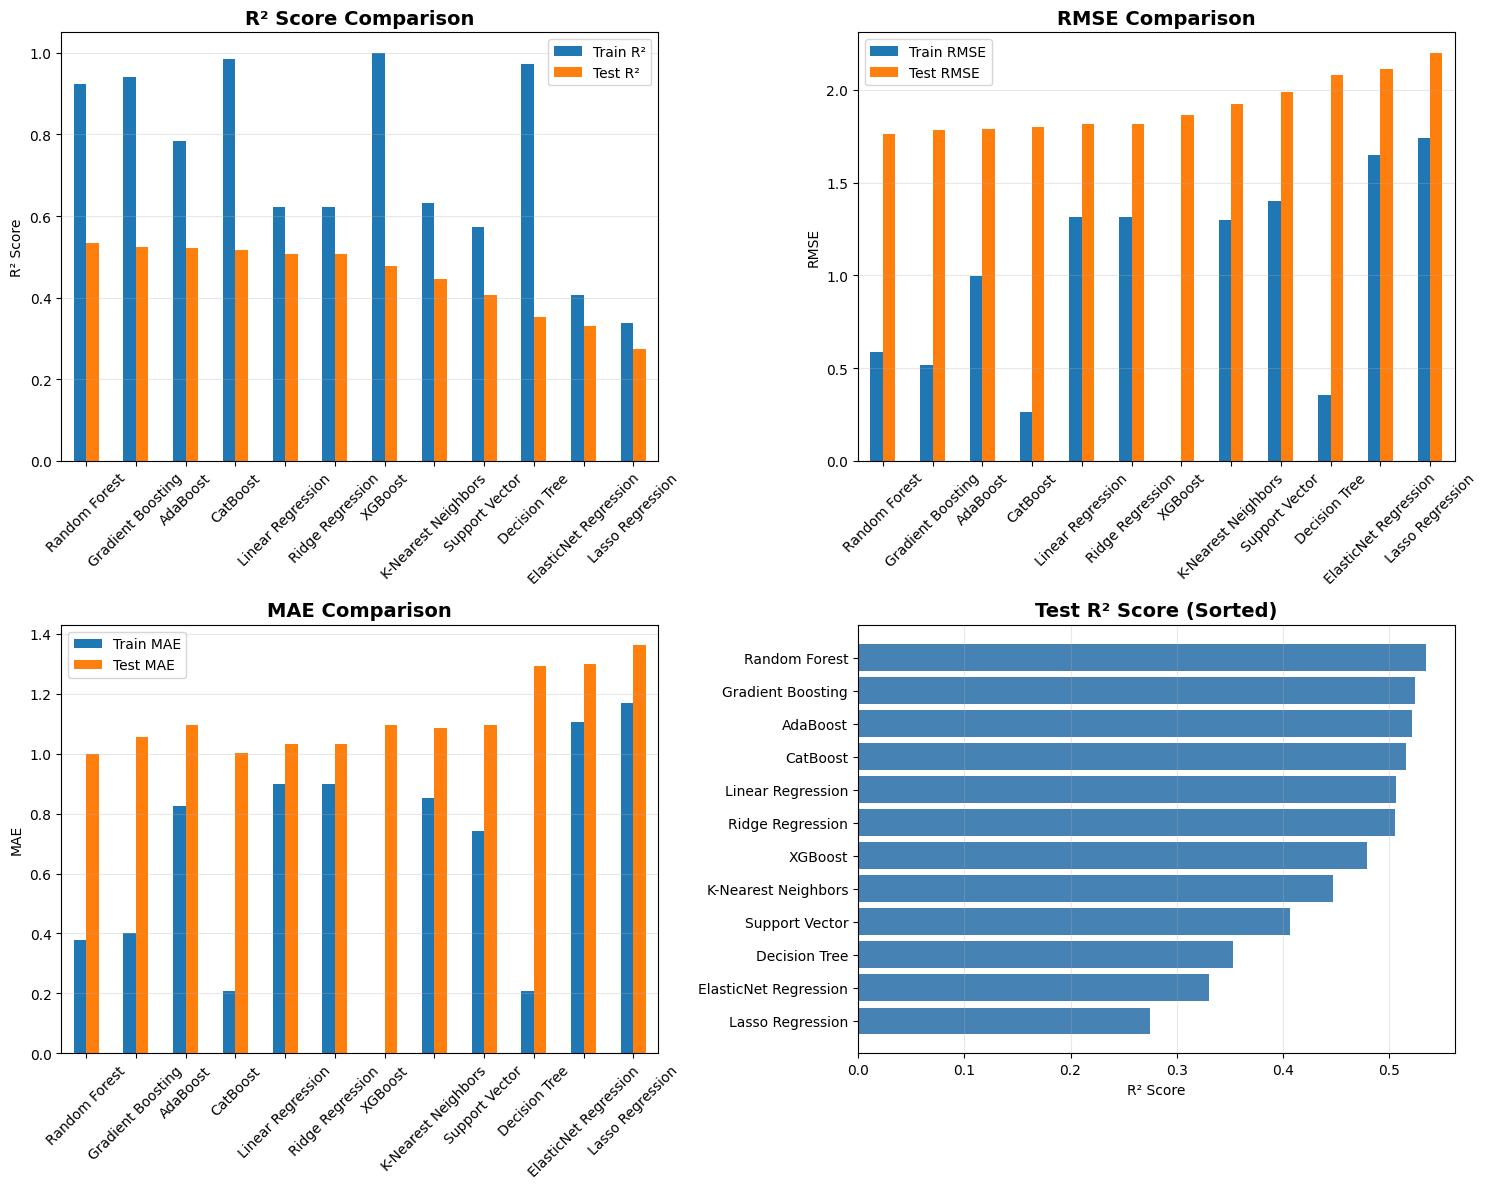

In [21]:
regression_results_df = pd.DataFrame(regression_results)
regression_results_df = regression_results_df.sort_values('Test_R2', ascending=False)
print(regression_results_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score
regression_results_df.plot(x='Model', y=['Train_R2', 'Test_R2'], kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_xlabel('')
axes[0, 0].legend(['Train R²', 'Test R²'])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# RMSE
regression_results_df.plot(x='Model', y=['Train_RMSE', 'Test_RMSE'], kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xlabel('')
axes[0, 1].legend(['Train RMSE', 'Test RMSE'])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# MAE
regression_results_df.plot(x='Model', y=['Train_MAE', 'Test_MAE'], kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('MAE Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xlabel('')
axes[1, 0].legend(['Train MAE', 'Test MAE'])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Test R² only (sorted)
sorted_df = regression_results_df.sort_values('Test_R2', ascending=True)
axes[1, 1].barh(sorted_df['Model'], sorted_df['Test_R2'], color='steelblue')
axes[1, 1].set_title('Test R² Score (Sorted)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('R² Score')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [22]:
best_reg_model = regression_results_df.iloc[0]

print(f"{best_reg_model['Model']}")
print(f"Performance Metrics:")
print(f"Test R²: {best_reg_model['Test_R2']:.4f}")
print(f"Test RMSE: {best_reg_model['Test_RMSE']:.4f}")
print(f"Test MAE: {best_reg_model['Test_MAE']:.4f}")
print(f"This model is the best so far and  explains {best_reg_model['Test_R2']*100:.2f}% of the variance in GlyHb levels.")

Random Forest
Performance Metrics:
Test R²: 0.5349
Test RMSE: 1.7611
Test MAE: 0.9997
This model is the best so far and  explains 53.49% of the variance in GlyHb levels.



Feature Importance from Random Forest:
 Feature  Importance
stab.glu    0.649885
     age    0.055268
    chol    0.041860
time.ppn    0.034872
   waist    0.030511
   ratio    0.028843
  height    0.025707
     hdl    0.025029
     hip    0.021827
   bp.1s    0.020842
   bp.1d    0.019546
  weight    0.018974
   bp.2s    0.015918
   bp.2d    0.010918


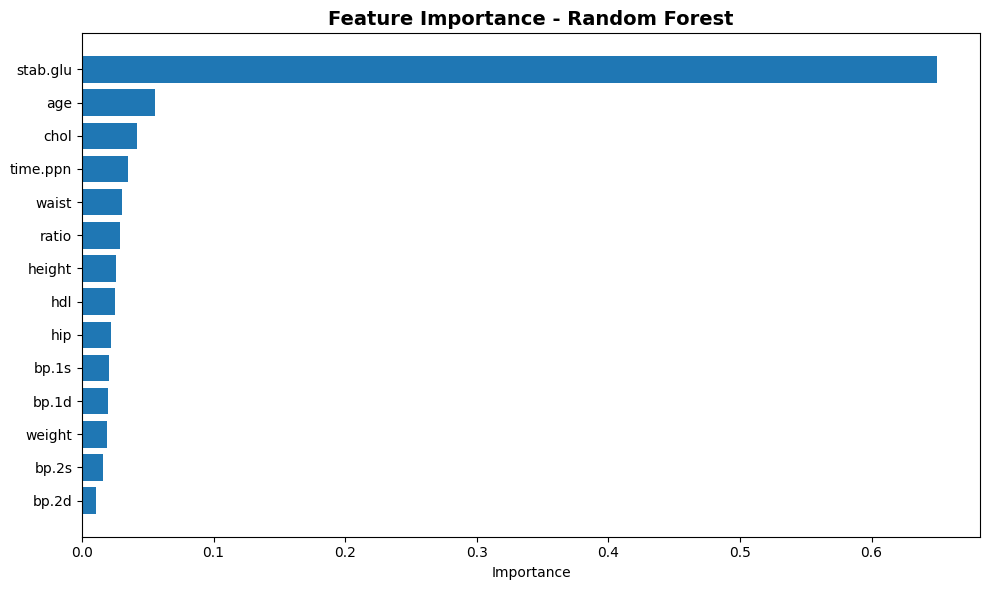


Correlation with GlyHb:
 Feature  Correlation
stab.glu     0.749236
     age     0.338929
   ratio     0.328788
    chol     0.247131
   waist     0.226337
   bp.1s     0.197773
  weight     0.168041
     hip     0.141894
  height     0.062543
   bp.2s     0.039228
time.ppn     0.033777
   bp.1d     0.033057
   bp.2d    -0.099956
     hdl    -0.148697


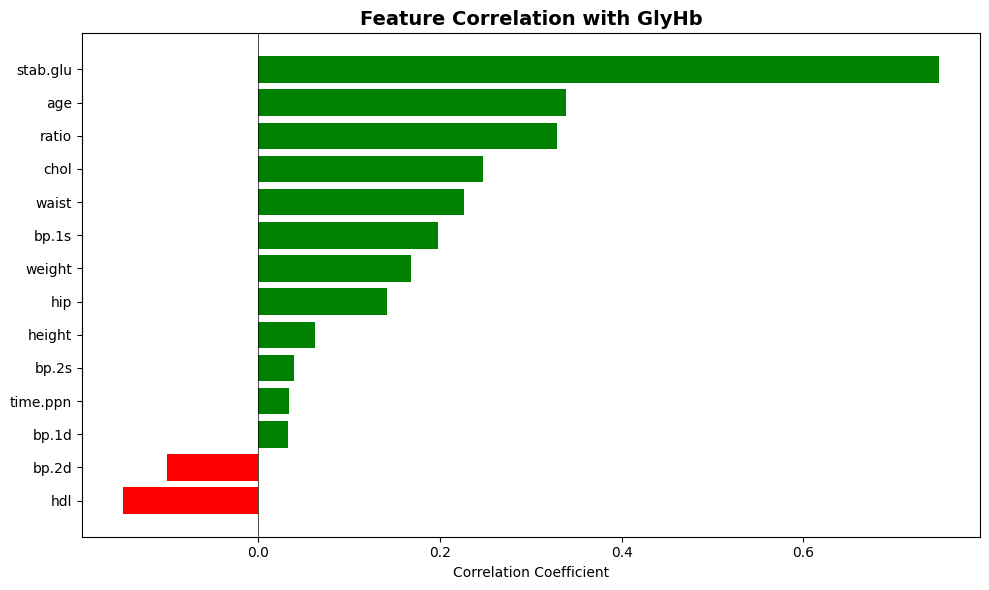

In [23]:
best_model_name = best_reg_model['Model']
best_model = regression_models[best_model_name]
best_model.fit(X_train_reg_scaled, y_train_reg)

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_regression_imputed.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\nFeature Importance from {best_model_name}:")
    print(feature_importance.to_string(index=False))

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

correlation_with_target = X_regression_imputed.corrwith(y_regression).sort_values(ascending=False)
correlation_df = pd.DataFrame({
    'Feature': correlation_with_target.index,
    'Correlation': correlation_with_target.values
})

print("\nCorrelation with GlyHb:")
print(correlation_df.to_string(index=False))

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlation_df['Correlation']]
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color=colors)
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with GlyHb', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
top_features = correlation_df.head(5)
print("\n✓ ANSWER: Top 5 key factors associated with GlyHb:")
for idx, row in top_features.iterrows():
    print(f"  {idx+1}. {row['Feature']}: correlation = {row['Correlation']:.4f}")


✓ ANSWER: Top 5 key factors associated with GlyHb:
  1. stab.glu: correlation = 0.7492
  2. age: correlation = 0.3389
  3. ratio: correlation = 0.3288
  4. chol: correlation = 0.2471
  5. waist: correlation = 0.2263


In [25]:

from sklearn.linear_model import LogisticRegression

In [26]:
classification_results = []

classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(iterations=100, random_state=42, verbose=0),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector': SVC(kernel='rbf', random_state=42)
}


print("\nTraining and evaluating classification models...")

for name, model in classification_models.items():
    print(f"\nTraining {name}...")

    # Train model
    model.fit(X_train_cls_scaled, y_train_cls)

    # Make predictions
    y_pred_train = model.predict(X_train_cls_scaled)
    y_pred_test = model.predict(X_test_cls_scaled)

    # Calculate metrics
    train_acc = accuracy_score(y_train_cls, y_pred_train)
    test_acc = accuracy_score(y_test_cls, y_pred_test)
    train_prec = precision_score(y_train_cls, y_pred_train, zero_division=0)
    test_prec = precision_score(y_test_cls, y_pred_test, zero_division=0)
    train_rec = recall_score(y_train_cls, y_pred_train, zero_division=0)
    test_rec = recall_score(y_test_cls, y_pred_test, zero_division=0)
    train_f1 = f1_score(y_train_cls, y_pred_train, zero_division=0)
    test_f1 = f1_score(y_test_cls, y_pred_test, zero_division=0)

    classification_results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Train_Precision': train_prec,
        'Test_Precision': test_prec,
        'Train_Recall': train_rec,
        'Test_Recall': test_rec,
        'Train_F1': train_f1,
        'Test_F1': test_f1
    })

    print(f"  Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"  Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}")


Training and evaluating classification models...

Training Logistic Regression...
  Train Accuracy: 0.9327, Test Accuracy: 0.8974
  Train F1: 0.7640, Test F1: 0.6364

Training K-Nearest Neighbors...
  Train Accuracy: 0.9231, Test Accuracy: 0.8462
  Train F1: 0.7143, Test F1: 0.4000

Training Decision Tree...
  Train Accuracy: 0.9840, Test Accuracy: 0.8590
  Train F1: 0.9495, Test F1: 0.5600

Training Random Forest...
  Train Accuracy: 1.0000, Test Accuracy: 0.9103
  Train F1: 1.0000, Test F1: 0.6957

Training XGBoost...
  Train Accuracy: 1.0000, Test Accuracy: 0.9231
  Train F1: 1.0000, Test F1: 0.7500

Training CatBoost...
  Train Accuracy: 0.9519, Test Accuracy: 0.9103
  Train F1: 0.8387, Test F1: 0.6957

Training AdaBoost...
  Train Accuracy: 0.9872, Test Accuracy: 0.8718
  Train F1: 0.9600, Test F1: 0.5455

Training Gradient Boosting...
  Train Accuracy: 1.0000, Test Accuracy: 0.8974
  Train F1: 1.0000, Test F1: 0.6667

Training Support Vector...
  Train Accuracy: 0.9519, Test Acc

              Model  Train_Accuracy  Test_Accuracy  Train_Precision  Test_Precision  Train_Recall  Test_Recall  Train_F1  Test_F1
            XGBoost        1.000000       0.923077         1.000000        0.818182      1.000000     0.692308  1.000000 0.750000
           CatBoost        0.951923       0.910256         0.951220        0.800000      0.750000     0.615385  0.838710 0.695652
      Random Forest        1.000000       0.910256         1.000000        0.800000      1.000000     0.615385  1.000000 0.695652
Logistic Regression        0.932692       0.897436         0.918919        0.777778      0.653846     0.538462  0.764045 0.636364
  Gradient Boosting        1.000000       0.897436         1.000000        0.727273      1.000000     0.615385  1.000000 0.666667
     Support Vector        0.951923       0.884615         1.000000        0.833333      0.711538     0.384615  0.831461 0.526316
           AdaBoost        0.987179       0.871795         1.000000        0.666667      0

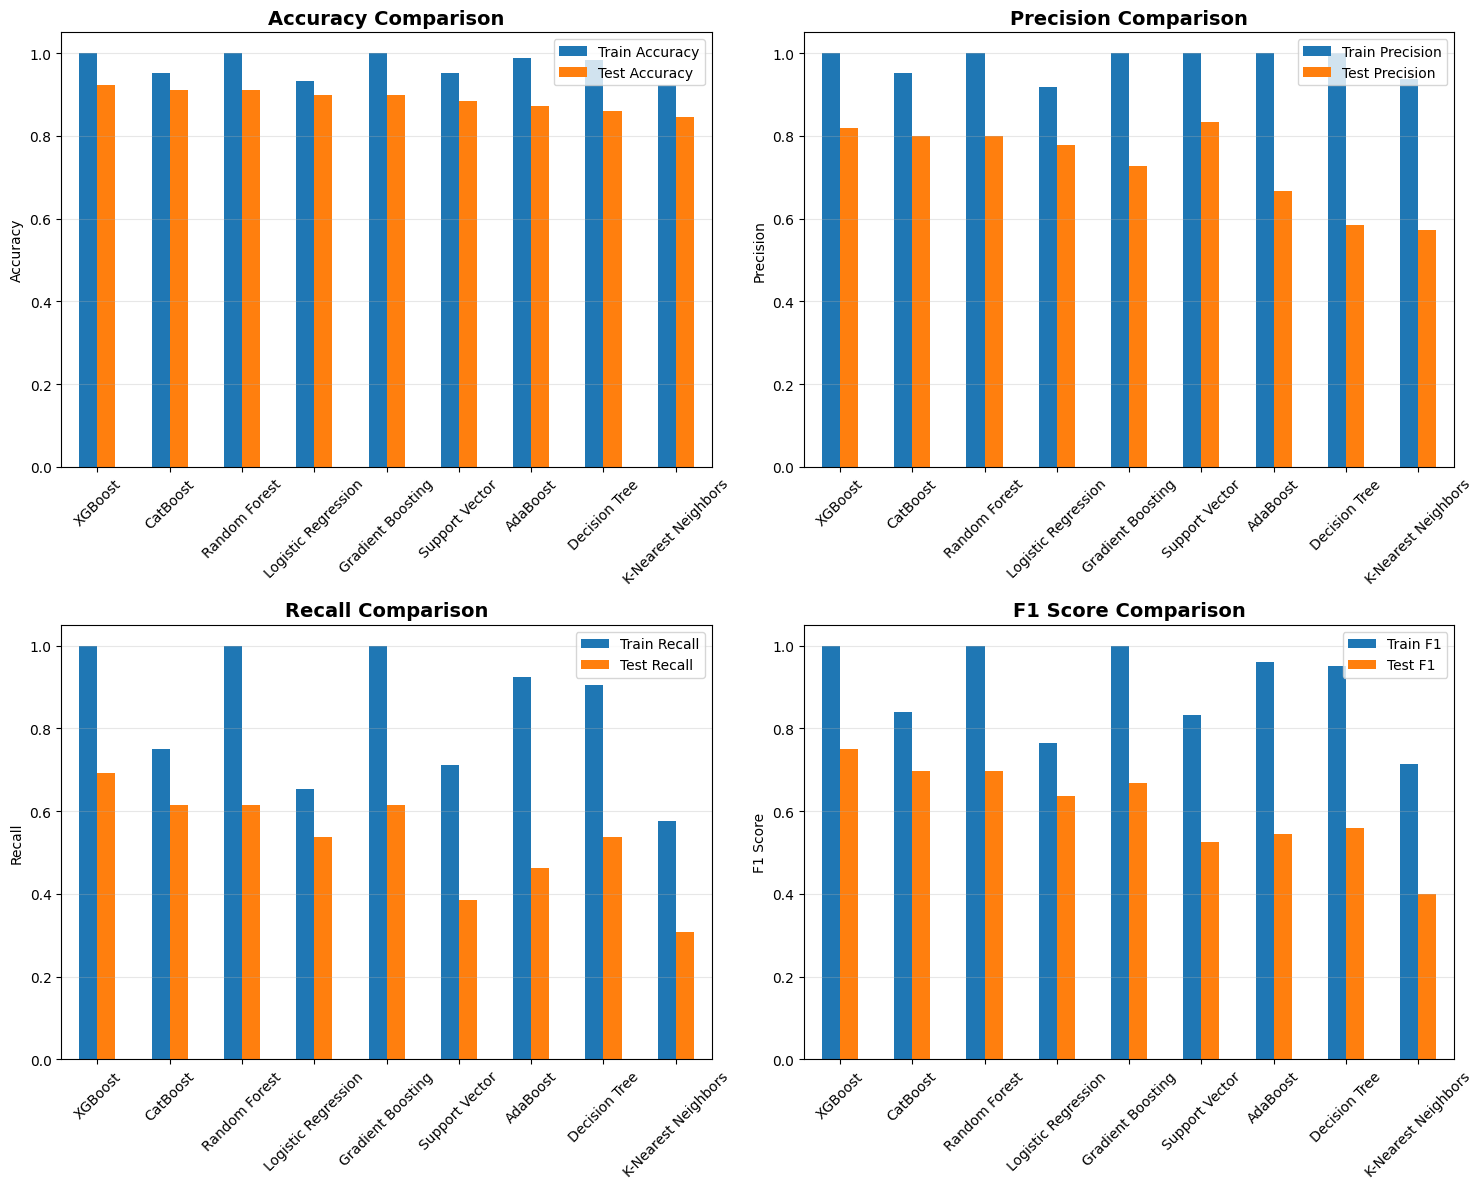

In [27]:
classification_results_df = pd.DataFrame(classification_results)
classification_results_df = classification_results_df.sort_values('Test_Accuracy', ascending=False)

print(classification_results_df.to_string(index=False))

# Visualize classification results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy
classification_results_df.plot(x='Model', y=['Train_Accuracy', 'Test_Accuracy'], kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xlabel('')
axes[0, 0].legend(['Train Accuracy', 'Test Accuracy'])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Precision
classification_results_df.plot(x='Model', y=['Train_Precision', 'Test_Precision'], kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xlabel('')
axes[0, 1].legend(['Train Precision', 'Test Precision'])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Recall
classification_results_df.plot(x='Model', y=['Train_Recall', 'Test_Recall'], kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xlabel('')
axes[1, 0].legend(['Train Recall', 'Test Recall'])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# F1 Score
classification_results_df.plot(x='Model', y=['Train_F1', 'Test_F1'], kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_xlabel('')
axes[1, 1].legend(['Train F1', 'Test F1'])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
best_cls_model = classification_results_df.iloc[0]


print(f"\n  {best_cls_model['Model']}")
print(f"\n Performance Metrics:")
print(f"Test Accuracy: {best_cls_model['Test_Accuracy']:.4f} ({best_cls_model['Test_Accuracy']*100:.2f}%)")
print(f" Test Precision: {best_cls_model['Test_Precision']:.4f}")
print(f" Test Recall: {best_cls_model['Test_Recall']:.4f}")
print(f" est F1 Score: {best_cls_model['Test_F1']:.4f}")



  XGBoost

 Performance Metrics:
Test Accuracy: 0.9231 (92.31%)
 Test Precision: 0.8182
 Test Recall: 0.6923
 est F1 Score: 0.7500


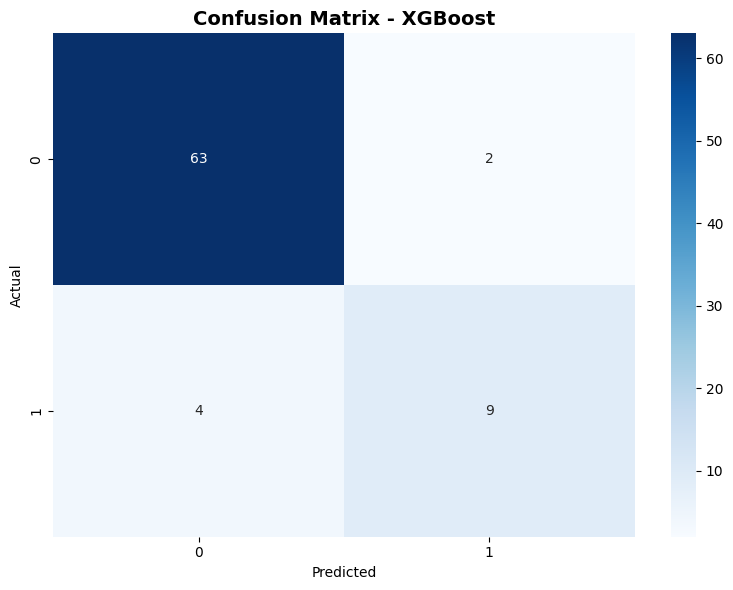


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.97      0.95        65
    Diabetes       0.82      0.69      0.75        13

    accuracy                           0.92        78
   macro avg       0.88      0.83      0.85        78
weighted avg       0.92      0.92      0.92        78



In [29]:
best_cls_model_obj = classification_models[best_cls_model['Model']]
best_cls_model_obj.fit(X_train_cls_scaled, y_train_cls)
y_pred_best = best_cls_model_obj.predict(X_test_cls_scaled)

cm = confusion_matrix(y_test_cls, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix - {best_cls_model["Model"]}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_best, target_names=['No Diabetes', 'Diabetes']))



Feature Importance from XGBoost:
 Feature  Importance
stab.glu    0.335334
     age    0.117237
    chol    0.089161
   waist    0.065912
time.ppn    0.062508
   bp.1s    0.055507
   ratio    0.044956
   bp.2s    0.043949
     hip    0.042131
   bp.2d    0.033006
  height    0.031759
   bp.1d    0.031646
  weight    0.025619
     hdl    0.021277

 Top 5 risk factors for diabetes:
  2. stab.glu: importance = 0.3353
  5. age: importance = 0.1172
  1. chol: importance = 0.0892
  12. waist: importance = 0.0659
  14. time.ppn: importance = 0.0625


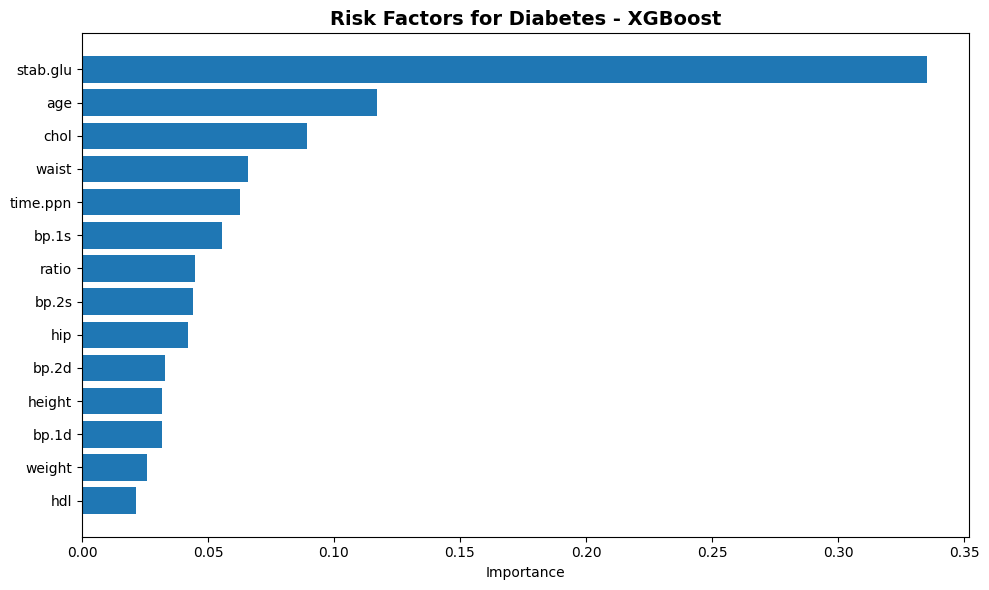

In [30]:
if hasattr(best_cls_model_obj, 'feature_importances_'):
    feature_importance_cls = pd.DataFrame({
        'Feature': X_classification.columns,
        'Importance': best_cls_model_obj.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\nFeature Importance from {best_cls_model['Model']}:")
    print(feature_importance_cls.to_string(index=False))

    print("\n Top 5 risk factors for diabetes:")
    for idx, row in feature_importance_cls.head(5).iterrows():
        print(f"  {idx+1}. {row['Feature']}: importance = {row['Importance']:.4f}")

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_cls['Feature'], feature_importance_cls['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Risk Factors for Diabetes - {best_cls_model["Model"]}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()